In [1]:
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
import pyfiglet

In [2]:
repos

['jenkinsci/jenkins']

   _            _    _                _    ___            _    _           
  (_) ___ _ __ | | _(_)_ __  ___  ___(_)  / (_) ___ _ __ | | _(_)_ __  ___ 
  | |/ _ \ '_ \| |/ / | '_ \/ __|/ __| | / /| |/ _ \ '_ \| |/ / | '_ \/ __|
  | |  __/ | | |   <| | | | \__ \ (__| |/ / | |  __/ | | |   <| | | | \__ \
 _/ |\___|_| |_|_|\_\_|_| |_|___/\___|_/_/ _/ |\___|_| |_|_|\_\_|_| |_|___/
|__/                                      |__/                             

updating jenkinsci/jenkins...
Repo is up to date!
Using precalculated structural values

Results from the structural view:

WeightGraph statistics: 1298 nodes, 4654 edges, 3 connected component(s), with sizes: [1292, 4, 2]
Edge weights: [1, 1, 1, 1, 1] ... [2, 2, 2, 2, 3] , mean: 1.056295659647615


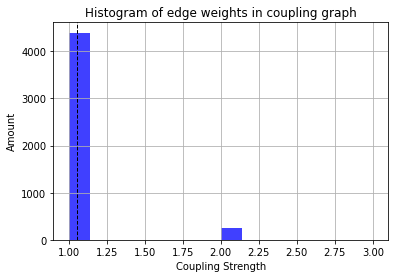

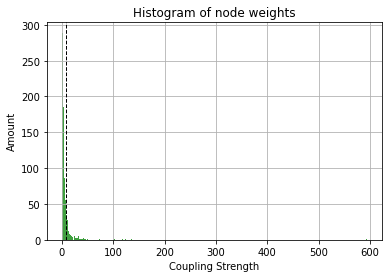



Using precalculated evolutionary values

Results from the evolutionary view:

WeightGraph statistics: 12501 nodes, 217856 edges, 401 connected component(s), with sizes: [11474, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 6, 4, 2, 1, 1, 1, 1, 12, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 5, 1, 1, 1, 4, 18, 1, 23, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 8, 1, 1, 6, 5, 2, 1, 1, 2, 2, 1, 28, 2, 1, 1, 1, 1, 1, 18, 12, 13, 5, 15, 26, 11, 9, 2, 6, 13, 5, 15, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 9, 3, 3, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6, 1, 1, 1, 5, 2, 1, 2, 2, 4, 14, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 

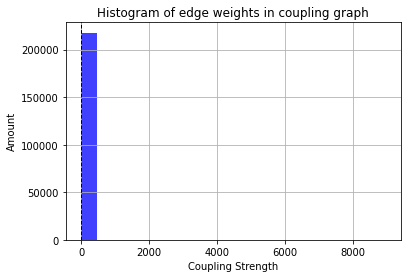

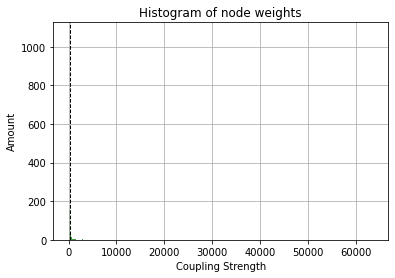



Using precalculated linguistic values

Results from the linguistic view:

WeightGraph statistics: 1639 nodes, 1342341 edges, 1 connected component(s), with sizes: [1639]
Edge weights: [2.578510805763392e-06, 2.6619348095075013e-06, 4.745192038655049e-06, 4.788434218463163e-06, 5.128393618139213e-06] ... [1.9999999999997429, 2.0, 2.0, 2.0, 2.0] , mean: 0.7963802472994446


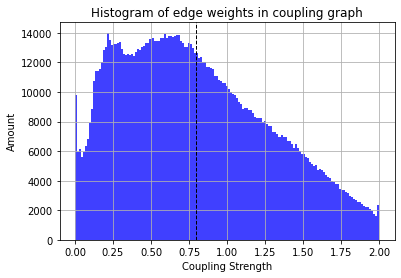

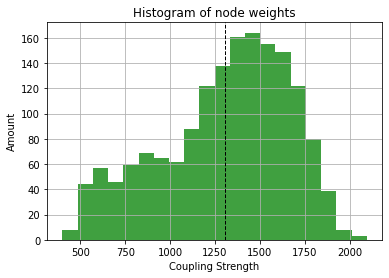




Program is over!


In [3]:
views = ["structural", "evolutionary", "linguistic"] # ["structural", "evolutionary", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # tree = RepoTree.init_from_repo(r)
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.show_weight_histogram()
        # coupling_graph.visualize()
        print("\n")
    
    
print("\nProgram is over!")